In [39]:
!git clone https://github.com/AshishJangra27/Fake-News-Classification

!unzip /content/Fake-News-Classification/Fake.zip
!unzip /content/Fake-News-Classification/True.zip
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [41]:
import pandas as pd
import numpy as np
import re
import spacy
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
nltk.download('punkt')
from tqdm import tqdm
nlp=spacy.load('en_core_web_lg')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

true['fake']=0
fake['fake']=1

df = pd.DataFrame()
df = pd.concat([true,fake],ignore_index=True)

del true
del fake

df = df.drop(columns = ['text','subject','date'],axis=1)
df=df.sample(frac=1) #to suffle the dataset
df

,title,fake
8518,"Trump would freeze new federal regulations, re...",0
13889,Cuba marks anniversary of Fidel death as post-...,0
25658,Trump’s Campaign CEO LITERALLY Ordered His Mi...,1
18812,Iraqi Shi’ite militias accused of rights abuse...,0
1084,U.S. lawmakers ask DOJ if terrorism law covers...,0
...,...,...
19567,Exclusive: From Russia with fuel - North Korea...,0
5585,U.S. House speaker says Obamacare replacement ...,0
1824,Factbox: Trump on Twitter (September 8) - Hurr...,0
23824,Top Conservative Tries To Define ‘Alt-Right’ ...,1


# Data preprocessing

In [42]:
titles = np.array(df['title'])
corpus=[]

for i in tqdm(range(len(titles))):
  news = re.sub(r'^a-zA-Z0-9','',titles[i])
  news = word_tokenize(news.lower())
  news = [ps.stem(word) for word in news if word not in stopwords.words('english') and len(word)>0]
  news = nlp(' '.join(news)).vector
  corpus.append(news)

corpus[0]


100%|██████████| 44898/44898 [10:55<00:00, 68.47it/s]


array([-0.3926364 ,  0.37367275,  0.4787855 ,  0.15548636,  1.3149264 ,
       -0.10051815,  0.43049076,  1.112729  , -1.836081  , -0.69473   ,
        1.5958962 ,  0.4549264 , -2.9874063 ,  0.22465457,  0.40793002,
        0.9163464 ,  0.44834453, -0.5460182 , -0.18630004,  0.3942091 ,
        0.7760891 , -0.3472036 ,  0.5405318 ,  0.56610507, -1.2625728 ,
       -0.36262456,  0.02368817,  0.10245454,  0.09940817,  0.47652638,
       -1.0128182 , -0.33700112, -0.3150109 ,  0.12421818,  0.00638784,
       -1.7663819 ,  0.6529427 , -0.2428109 , -0.3959609 , -0.01442732,
        0.95842993, -0.6513989 , -0.3447019 ,  0.6192518 , -1.4006482 ,
        1.0470783 ,  0.6448873 , -0.69473636,  0.59776276,  0.14984232,
       -1.3143824 , -0.35725012,  0.46304998, -1.8151772 , -0.95717186,
        0.8195391 , -0.06635273,  0.9238564 ,  0.8576422 ,  0.39441815,
        1.3089418 ,  0.06463454,  0.9763653 , -0.5670563 ,  1.5459081 ,
        1.8895398 , -0.8161018 , -2.4280818 ,  0.20489998,  0.50

In [43]:
X=np.array(corpus)
X_train = X[:35000]
X_test = X[35000:]
y_train =  df['fake'][:35000]
y_test =  df['fake'][35000:]

Model Training

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 1, max_iter = 50)
model.fit(X_train,y_train)

LogisticRegression(max_iter=50, random_state=1)

In [45]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Accuracy Score : ",round(accuracy_score(y_test,y_pred)*100,2))
cr = classification_report(y_test,y_pred)
print(cm,cr)

Accuracy Score :  93.99
[[4441  233]
 [ 362 4862]]               precision    recall  f1-score   support

           0       0.92      0.95      0.94      4674
           1       0.95      0.93      0.94      5224

    accuracy                           0.94      9898
   macro avg       0.94      0.94      0.94      9898
weighted avg       0.94      0.94      0.94      9898



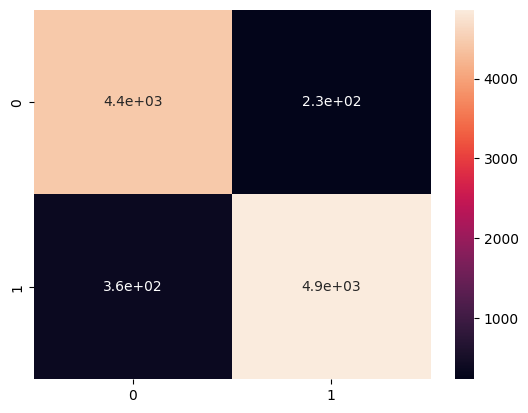

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()